#100 EPOCH

#Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Train

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("university-bwrcv").project("head-motion-using-histogram")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow workspace...
loa


Extracting Dataset Version Zip to Head-motion-using-Histogram-1 in yolov8:: 100%|██████████| 9602/9602 [00:00<00:00, 10597.75it/s]


## Custom Training

In [ ]:
# Create a YOLO model instance
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(data='/content/Head-motion-using-Histogram-1/data.yaml', epochs=100, imgsz=128, rect=True, plots=True, save_period=1)

100%|██████████| 6.23M/6.23M [00:00<00:00, 19.9MB/s]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Head-motion-using-Histogram-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=128, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 91.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Head-motion-using-Histogram-1/train/labels... 4258 images, 4 backgrounds, 0 corrupt: 100%|██████████| 4258/4258 [00:02<00:00, 1769.00it/s]


train: New cache created: /content/Head-motion-using-Histogram-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Scanning /content/Head-motion-using-Histogram-1/valid/labels... 269 images, 0 backgrounds, 0 corrupt: 100%|██████████| 269/269 [00:00<00:00, 792.64it/s]

val: New cache created: /content/Head-motion-using-Histogram-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.608G      1.464      2.606      1.261          2        128: 100%|██████████| 267/267 [00:35<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        269        269      0.357      0.869      0.665      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.455G       1.13      1.404      1.062          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        269        269      0.469      0.671      0.708      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.455G      1.078      1.191      1.057          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]

                   all        269        269      0.648      0.964      0.808      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.455G      1.063      1.047      1.058          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]

                   all        269        269      0.718      0.978       0.83      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.455G     0.9897     0.9465      1.032          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]

                   all        269        269       0.75      0.942      0.866      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.455G     0.9772     0.8663      1.027          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.48it/s]

                   all        269        269      0.787      0.971      0.863      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.455G     0.9374     0.8462      1.012          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        269        269      0.847       0.86      0.934      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.455G      0.889     0.7884     0.9973          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]


                   all        269        269      0.784       0.96      0.932      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.455G     0.8772      0.729     0.9942          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        269        269       0.85       0.94      0.987      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.455G     0.8412      0.679     0.9771          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.87it/s]

                   all        269        269      0.848      0.938      0.987      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.455G     0.8257     0.6316     0.9686          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        269        269      0.929      0.946      0.981      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.455G     0.8288     0.6135     0.9757          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        269        269      0.962      0.953      0.991      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.455G     0.8184     0.5628     0.9682          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.08it/s]


                   all        269        269      0.949      0.986      0.992      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.455G     0.8158     0.5427     0.9688          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]

                   all        269        269      0.967      0.972       0.99      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.455G     0.7788     0.5253     0.9571          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]

                   all        269        269      0.958      0.965      0.983      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.455G     0.7726     0.4767     0.9515          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]

                   all        269        269      0.983      0.996      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.455G     0.7791     0.4722     0.9523          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]

                   all        269        269      0.963      0.992      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.455G     0.7668     0.4556     0.9497          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.40it/s]

                   all        269        269      0.989      0.997      0.992      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.455G       0.77     0.4351     0.9514          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]

                   all        269        269      0.993      0.997      0.994      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.455G     0.7512     0.4134     0.9426          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]

                   all        269        269      0.994      0.997      0.993      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.455G     0.7548     0.4087     0.9441          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]

                   all        269        269      0.992      0.997      0.991      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.455G     0.7588     0.4059     0.9498          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]

                   all        269        269      0.991      0.988      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.455G     0.7497     0.3957     0.9431          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

                   all        269        269      0.993      0.997      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.455G     0.7445      0.399     0.9432          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        269        269       0.99      0.994      0.992      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.455G      0.735     0.3969     0.9399          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        269        269      0.992      0.997      0.993      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.455G     0.7271     0.3847     0.9336          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        269        269      0.992      0.997      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.455G     0.7134     0.3728     0.9325          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.37it/s]

                   all        269        269      0.992      0.997      0.992      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.455G     0.7017     0.3676     0.9263          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        269        269      0.993      0.997       0.99      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.455G     0.7057     0.3608     0.9273          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.37it/s]

                   all        269        269      0.992      0.994      0.992      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.455G      0.696     0.3718     0.9231          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        269        269      0.994      0.997      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.455G     0.6937     0.3572     0.9238          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        269        269      0.993      0.995      0.993      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.455G      0.674     0.3527     0.9174          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        269        269      0.993      0.997      0.991      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.455G       0.69     0.3487     0.9222          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]

                   all        269        269      0.991      0.997      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.455G     0.6803     0.3475     0.9186          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.12it/s]

                   all        269        269      0.993      0.995      0.992       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.455G     0.6735     0.3401     0.9195          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        269        269      0.995      0.994      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.455G     0.6671     0.3359     0.9164          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]

                   all        269        269      0.993      0.997      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.455G     0.6738     0.3378     0.9186          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]

                   all        269        269      0.992      0.997      0.992      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.455G     0.6631     0.3299     0.9115          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]

                   all        269        269      0.994      0.997      0.993      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.455G     0.6598      0.329     0.9131          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]

                   all        269        269      0.993      0.997      0.993      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.455G     0.6629     0.3296     0.9117          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]

                   all        269        269      0.994      0.997      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.455G     0.6592     0.3303     0.9094          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]

                   all        269        269      0.993      0.997      0.993      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.455G     0.6601     0.3238     0.9101          2        128: 100%|██████████| 267/267 [00:28<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]

                   all        269        269      0.993      0.997      0.992      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.455G     0.6541     0.3226     0.9147          2        128: 100%|██████████| 267/267 [00:33<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]

                   all        269        269      0.994      0.997      0.991      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.455G     0.6453     0.3188     0.9063          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]

                   all        269        269      0.993      0.997      0.992      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.455G     0.6449     0.3136     0.9098          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        269        269       0.99      0.995      0.991      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.455G     0.6429     0.3126     0.9053          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        269        269      0.991      0.997      0.992      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.455G     0.6367      0.307     0.9028          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]

                   all        269        269      0.992      0.997      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.455G     0.6464      0.311     0.9077          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.92it/s]

                   all        269        269       0.99      0.994      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.455G     0.6414     0.3067     0.9067          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        269        269      0.991      0.997      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.455G     0.6287     0.3048     0.9008          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]

                   all        269        269       0.99      0.996      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.455G     0.6323     0.3045     0.9003          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        269        269      0.993      0.997      0.992      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.455G     0.6205     0.2963     0.8959          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        269        269      0.993      0.995      0.991      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.455G      0.623     0.2963     0.9021          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]

                   all        269        269      0.986      0.997      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.455G     0.6212     0.2952     0.8986          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]

                   all        269        269      0.993      0.994      0.993      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.455G     0.6179     0.2926     0.8957          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]

                   all        269        269      0.991      0.991      0.994      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.455G      0.619     0.2907     0.8977          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.88it/s]

                   all        269        269      0.992      0.981      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.455G     0.6149     0.2903     0.8985          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        269        269      0.991      0.981      0.993       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.455G     0.6105     0.2886      0.894          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        269        269      0.985      0.994      0.993      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.455G     0.6055     0.2876     0.8968          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]

                   all        269        269      0.985      0.996      0.992      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.455G     0.6074     0.2872     0.8959          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        269        269      0.993      0.997      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.455G     0.6006     0.2837     0.8906          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]

                   all        269        269       0.99      0.997      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.455G     0.6033     0.2833     0.8928          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        269        269      0.994      0.997      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.455G      0.597     0.2824     0.8927          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]

                   all        269        269      0.993      0.996      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.455G     0.6011      0.282      0.896          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        269        269      0.994      0.997      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.455G     0.5977     0.2791     0.8897          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.18it/s]

                   all        269        269      0.992      0.995      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.455G     0.5893     0.2751     0.8902          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        269        269      0.994      0.997      0.993      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.455G     0.5927     0.2752     0.8861          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]

                   all        269        269      0.992      0.996      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.455G      0.586     0.2748     0.8897          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        269        269      0.991      0.996      0.994      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.455G     0.5882     0.2737     0.8869          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        269        269      0.994      0.997      0.994      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.455G     0.5828     0.2714     0.8904          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        269        269      0.992      0.996      0.992      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.455G     0.5836     0.2717     0.8878          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]

                   all        269        269      0.985      0.997      0.994      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.455G     0.5788     0.2708     0.8824          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]

                   all        269        269      0.994      0.997      0.993      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.455G     0.5837     0.2697     0.8861          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        269        269      0.994      0.997      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.455G     0.5731      0.266     0.8843          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.12it/s]


                   all        269        269      0.992      0.997      0.994      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.455G     0.5794     0.2653      0.887          2        128: 100%|██████████| 267/267 [00:29<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]

                   all        269        269      0.993      0.994      0.994      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.455G     0.5758     0.2636      0.881          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]

                   all        269        269      0.994      0.997      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.455G     0.5725     0.2645     0.8837          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]

                   all        269        269      0.994      0.997      0.993      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.455G     0.5705     0.2605     0.8822          2        128: 100%|██████████| 267/267 [00:29<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.69it/s]

                   all        269        269      0.994      0.997      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.455G     0.5692     0.2605     0.8799          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        269        269      0.994      0.997      0.994       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.455G      0.568     0.2597     0.8813          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        269        269      0.994      0.997      0.994      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.455G     0.5661     0.2573     0.8786          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.56it/s]


                   all        269        269      0.993      0.997      0.994      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.455G      0.565     0.2567     0.8834          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        269        269      0.991      0.997      0.993      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.455G     0.5621      0.255     0.8787          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]

                   all        269        269      0.994      0.997      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.455G     0.5603     0.2546     0.8792          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        269        269      0.994      0.997      0.994      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.455G      0.556     0.2537     0.8794          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        269        269      0.994      0.997      0.994      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.455G     0.5577     0.2519      0.878          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]


                   all        269        269      0.994      0.997      0.993      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.455G     0.5538     0.2495     0.8771          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]

                   all        269        269      0.995      0.997      0.994       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.455G     0.5542      0.251     0.8788          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]

                   all        269        269      0.994      0.997      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.455G     0.5498     0.2484     0.8735          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        269        269      0.994      0.997      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.455G      0.553     0.2469     0.8733          2        128: 100%|██████████| 267/267 [00:30<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.07it/s]

                   all        269        269      0.994      0.997      0.995      0.852


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.455G     0.5452     0.2457     0.8765          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]

                   all        269        269      0.994      0.997      0.994      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.455G     0.5482     0.2458     0.8748          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        269        269      0.994      0.997      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.455G     0.5462     0.2491     0.8734          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]

                   all        269        269      0.994      0.997      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.455G     0.5422     0.2455     0.8756          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        269        269      0.994      0.997      0.993      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.455G     0.5424     0.2454     0.8725          2        128: 100%|██████████| 267/267 [00:34<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        269        269      0.994      0.997      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.455G     0.5394     0.2435      0.872          2        128: 100%|██████████| 267/267 [00:32<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        269        269      0.994      0.997      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.455G     0.5377     0.2415     0.8746          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]

                   all        269        269      0.994      0.997      0.994      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.455G     0.5381     0.2421     0.8718          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.48it/s]

                   all        269        269      0.994      0.997      0.993      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.455G     0.5398     0.2412     0.8705          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]

                   all        269        269      0.994      0.997      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.455G     0.5343     0.2388     0.8667          2        128: 100%|██████████| 267/267 [00:31<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        269        269      0.994      0.997      0.994      0.856



100 epochs completed in 0.900 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]


                   all        269        269      0.994      0.997      0.994      0.857
                  atas        269         59      0.998          1      0.995      0.799
                 bawah        269         66      0.998      0.985      0.993      0.865
                 depan        269         47      0.977          1      0.991      0.872
                 kanan        269         51      0.998          1      0.995      0.878
                  kiri        269         46      0.999          1      0.995      0.873
Speed: 0.0ms preprocess, 1.2ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train


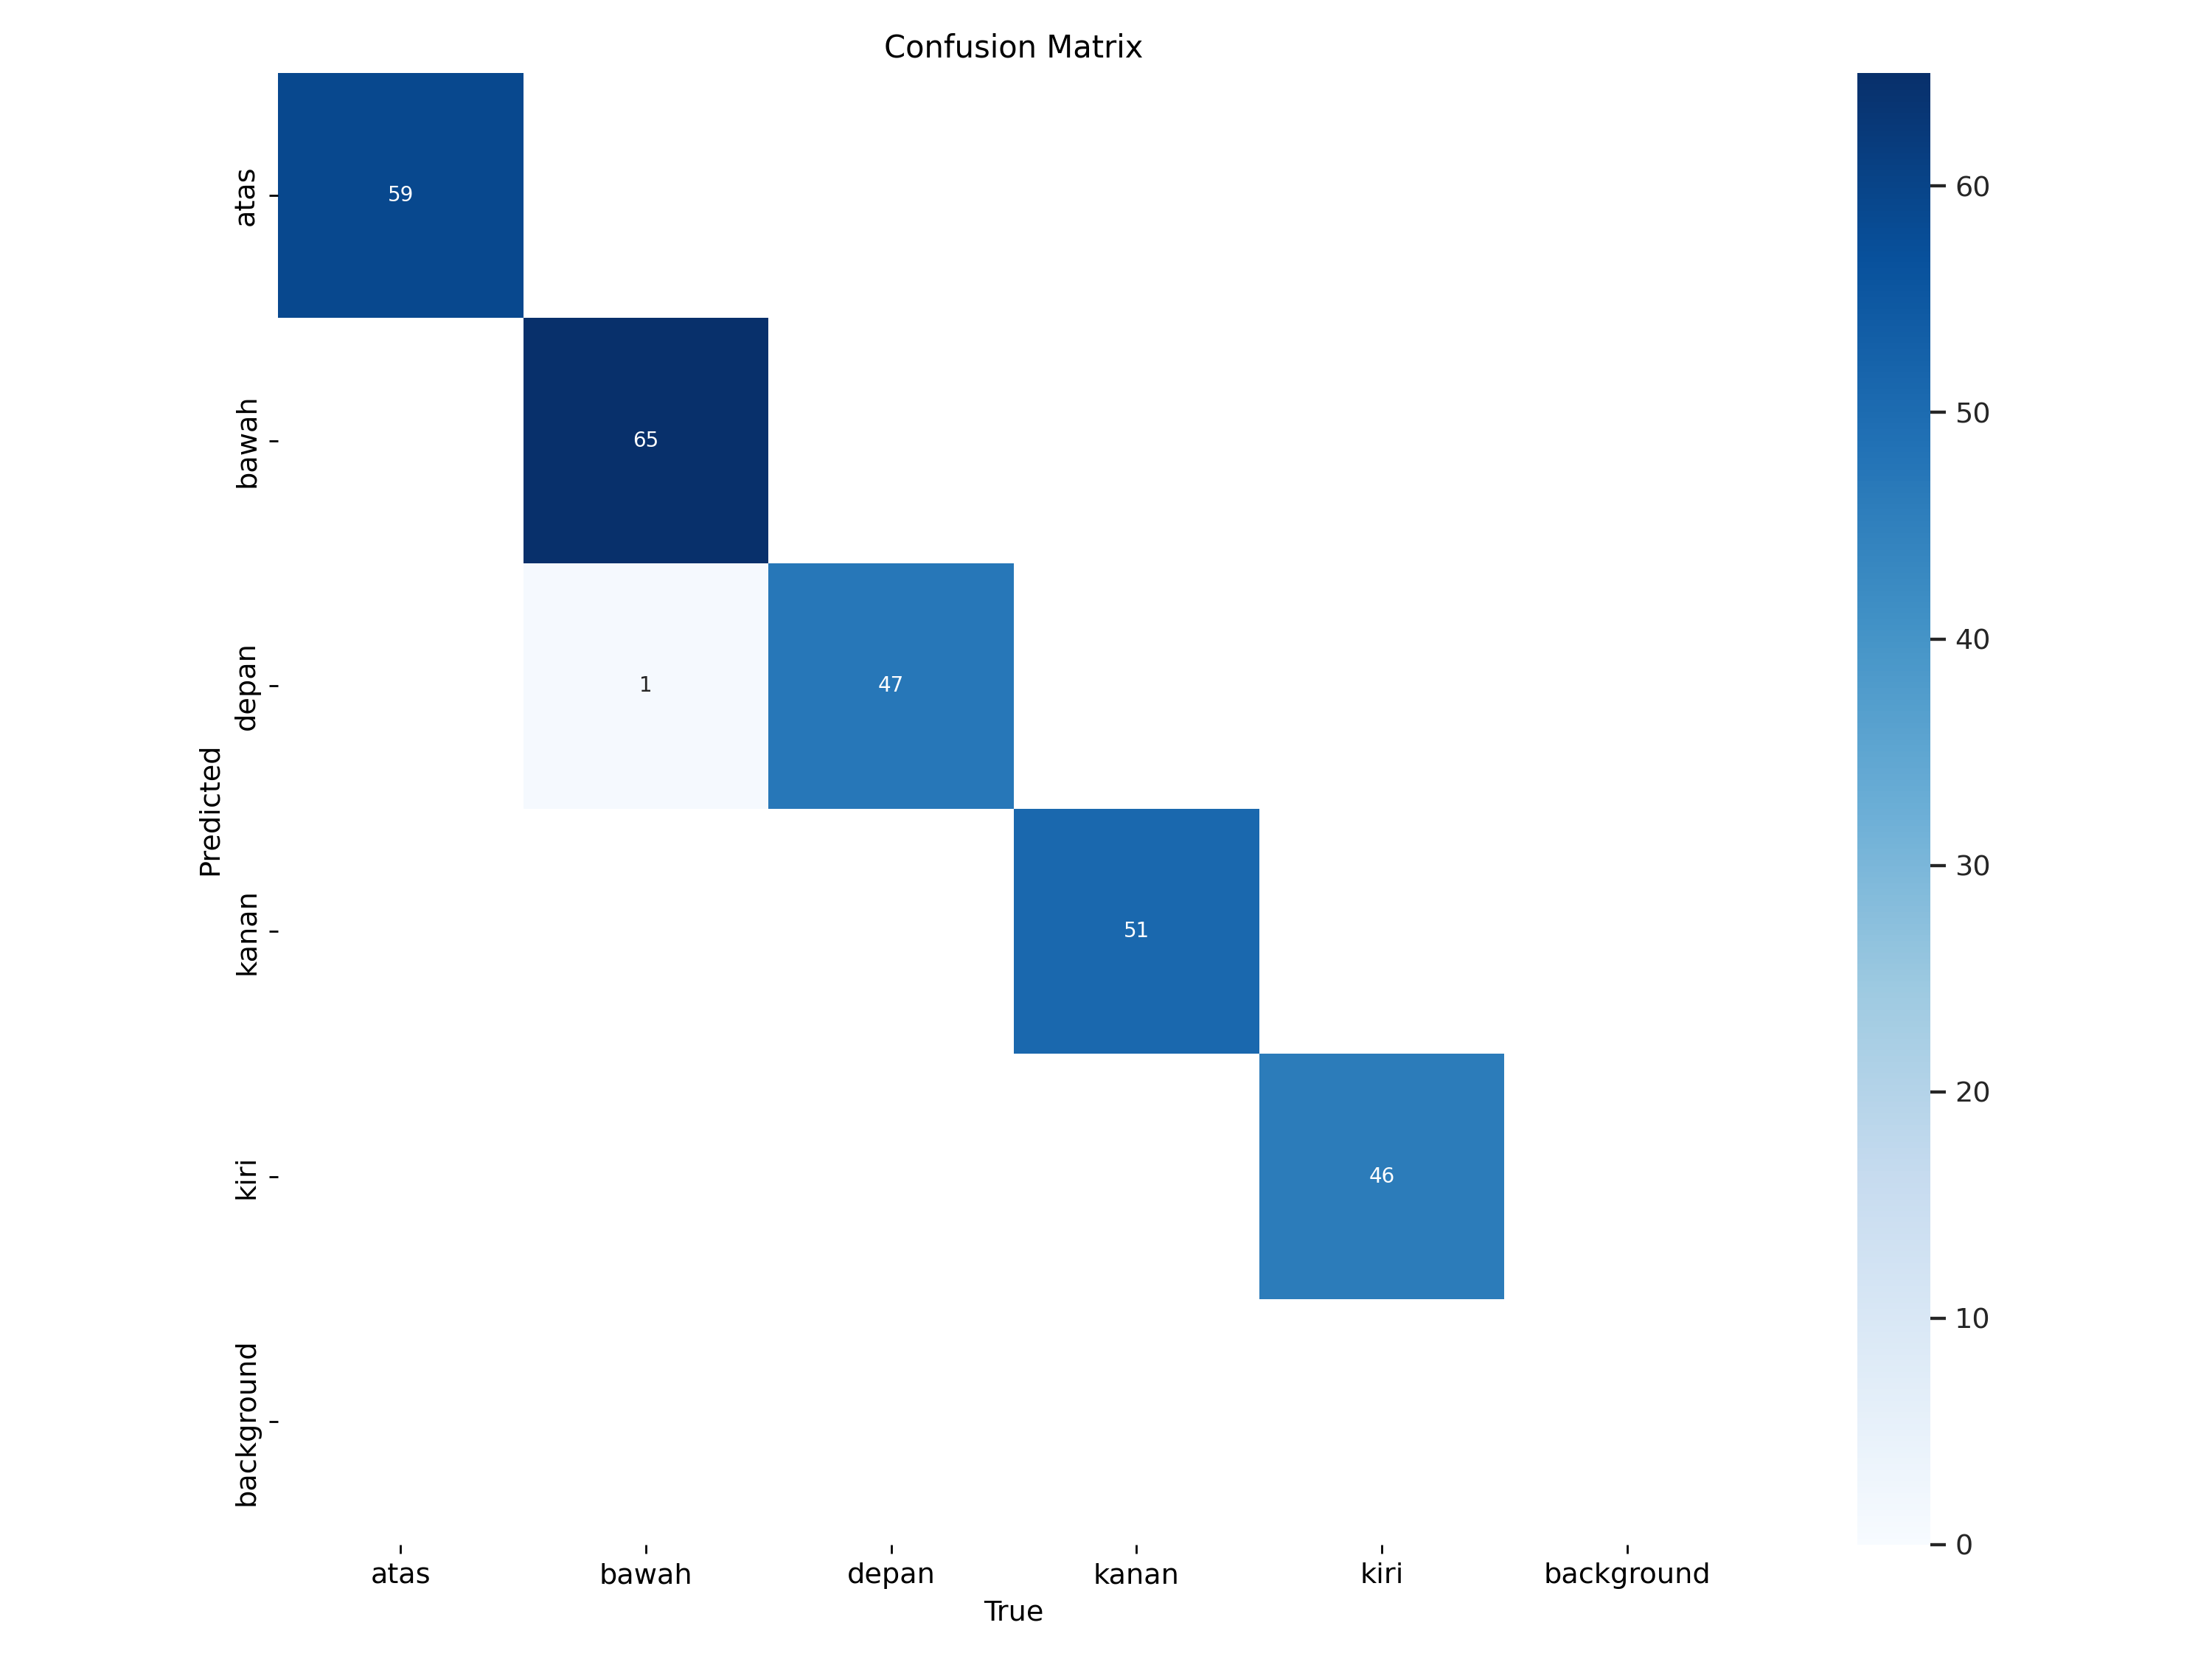

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

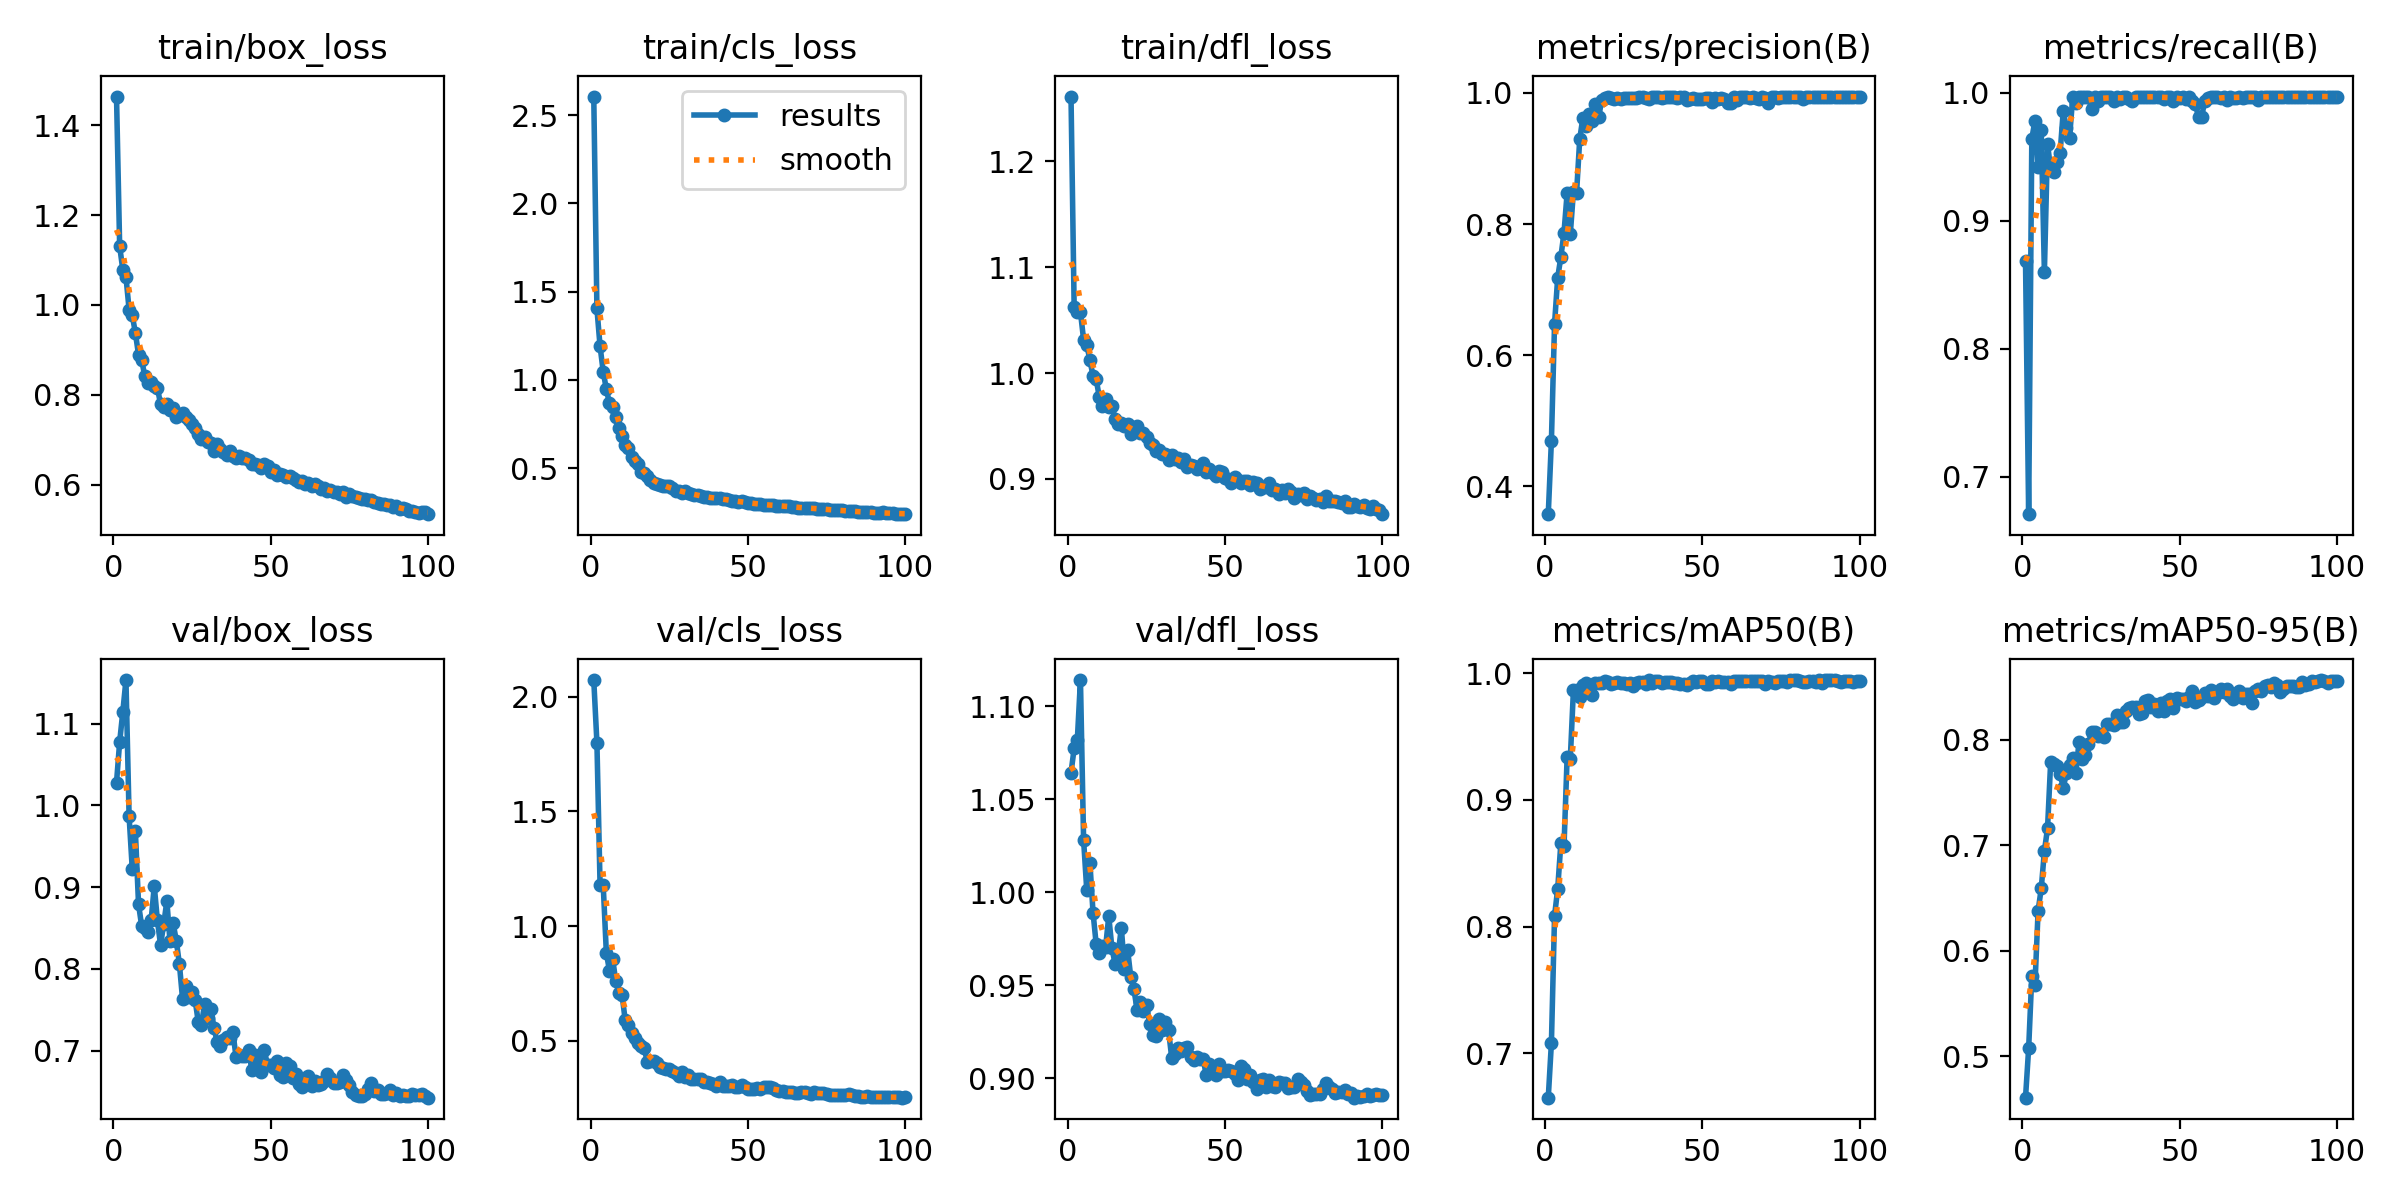

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

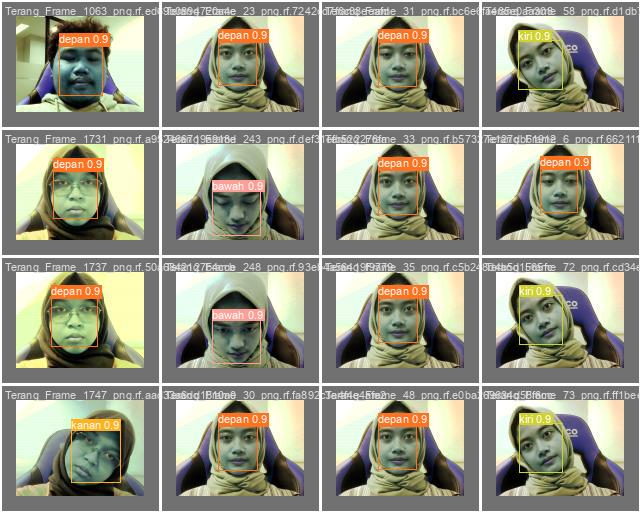

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Head-motion-using-Histogram-1/valid/labels.cache... 269 images, 0 backgrounds, 0 corrupt: 100%|██████████| 269/269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]


                   all        269        269      0.994      0.997      0.994      0.856
                  atas        269         59      0.998          1      0.995      0.802
                 bawah        269         66      0.998      0.985      0.993      0.862
                 depan        269         47      0.977          1      0.991      0.868
                 kanan        269         51      0.998          1      0.995      0.878
                  kiri        269         46      0.999          1      0.995      0.873
Speed: 0.1ms preprocess, 4.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


## Inference with Custom Model

In [ ]:
from ultralytics import YOLO
import glob
from PIL import Image

# Specify the directory where your images are located
image_dir = '/content/Head-motion-using-Histogram-1/test/images/'

# Use glob to get a list of image file paths
image_paths = glob.glob(image_dir + '*.jpg')

# Check if the image_paths list is empty
if not image_paths:
    print("No image files found in the specified directory.")
else:
    # Initialize a list to store the loaded images
    images = []

    # Load each image using PIL (you can also use OpenCV if preferred)
    for image_path in image_paths:
        image = Image.open(image_path)
        images.append(image)

    # Run inference on the list of loaded images
    model.predict(images, save=True, imgsz=128, rect=True, plots=True, conf=0.5)



0: 96x128 1 atas, 1: 96x128 1 kiri, 2: 96x128 1 bawah, 3: 96x128 1 bawah, 4: 96x128 1 depan, 5: 96x128 1 kiri, 6: 96x128 1 depan, 7: 96x128 1 kiri, 8: 96x128 1 depan, 9: 96x128 1 atas, 10: 96x128 1 atas, 11: 96x128 1 atas, 12: 96x128 1 bawah, 13: 96x128 1 kiri, 14: 96x128 1 atas, 15: 96x128 1 kanan, 16: 96x128 1 bawah, 17: 96x128 1 kiri, 18: 96x128 1 atas, 19: 96x128 1 bawah, 20: 96x128 1 kanan, 21: 96x128 1 kiri, 22: 96x128 1 bawah, 23: 96x128 1 atas, 24: 96x128 1 kiri, 25: 96x128 1 atas, 26: 96x128 1 bawah, 27: 96x128 1 bawah, 28: 96x128 1 atas, 29: 96x128 1 kiri, 30: 96x128 1 bawah, 31: 96x128 1 atas, 32: 96x128 1 bawah, 33: 96x128 1 kiri, 34: 96x128 1 atas, 35: 96x128 1 bawah, 36: 96x128 1 bawah, 37: 96x128 1 atas, 38: 96x128 1 kiri, 39: 96x128 1 atas, 40: 96x128 1 kanan, 41: 96x128 1 kiri, 42: 96x128 1 kanan, 43: 96x128 1 depan, 44: 96x128 1 bawah, 45: 96x128 1 kanan, 46: 96x128 1 kanan, 47: 96x128 1 depan, 48: 96x128 1 bawah, 49: 96x128 1 kanan, 50: 96x128 1 kiri, 51: 96x128 1 a

**NOTE:** Let's take a look at few results.

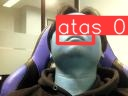

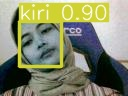

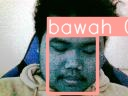

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

#ZIP

In [ ]:
import zipfile
import os

def zip_folder(source_folder, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(source_folder):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, source_folder)
                zipf.write(file_path, arcname)

source_folder = '/content/runs'
output_path = '/content/YOUR_DESIRED_NAME.zip'

zip_folder(source_folder, output_path)
print(f'Folder "{source_folder}" zipped to "{output_path}"')


#Move folder

In [ ]:
import shutil

# Source and destination paths
source_path = "/content/runs_histogram" #I change my folder name from runs to runs_histogram
destination_path = "/content/drive/YOUR_DESIRED_PATH"

# Move the directory
shutil.move(source_path, destination_path)


'/content/drive/MyDrive/koding kuliah skripsi/YOLO Train FIX/Training with callback/runs_histogram'